In [ ]:
%load_ext autoreload
%autoreload 2
# %matplotlib qt

In [ ]:
import os
import numpy as np
from time import sleep

from ICARUS.Database.Database_2D import Database_2D
from ICARUS.Database import XFLRDB

In [ ]:
HOMEDIR = os.getcwd()

# Load Database

In [ ]:
db = Database_2D()
db.load_data()
airfoils = db.data

print(f"Airfoils that are computed are:")
for i , key in enumerate(list(airfoils.keys())):
    print(f"{i}: {key}")
sleep(1)
# index = int(input("Select an Airfoil: "))
index = 0
airfoil = list(airfoils.keys())[index]

In [ ]:
from ICARUS.Software.XFLR5.polars import read_polars_2d
read_polars_2d(db, XFLRDB)

# Airfoil Polars

In [18]:
from ICARUS.Visualization.airfoilPolars import plot_airfoil_polars

In [19]:
db.data["NACA4415"].keys()

dict_keys(['Foil2Wake', 'OpenFoam', 'Xfoil', 'XFLR'])

NACA 0008 polars are:


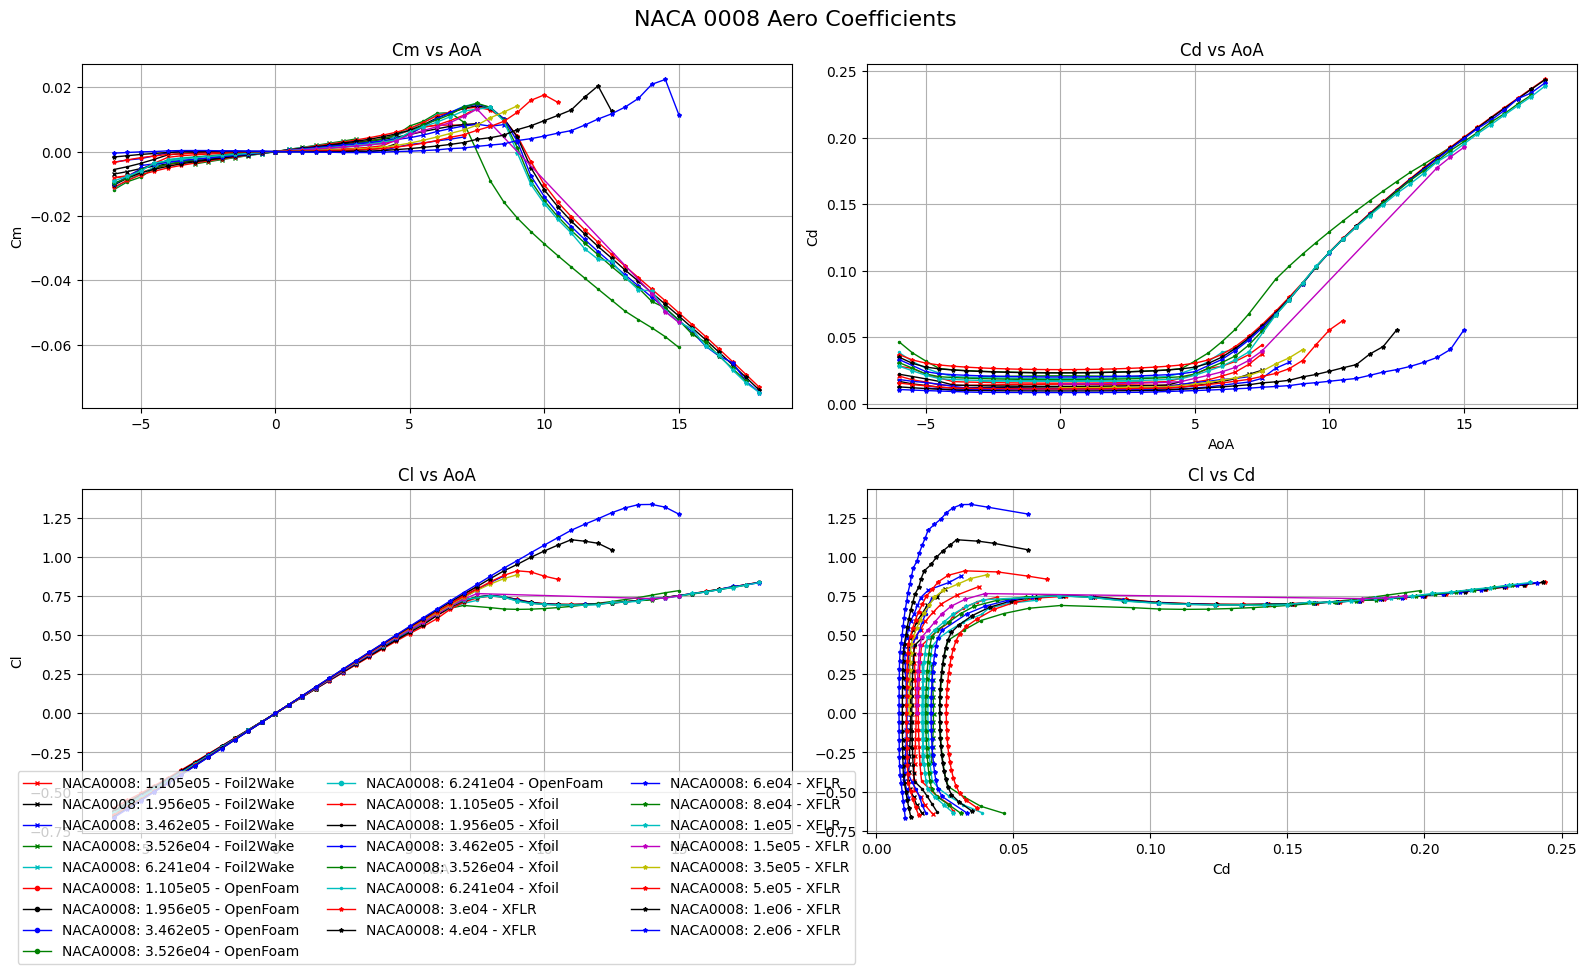

In [20]:
print(f"NACA {airfoil[4:]} polars are:")
plot_airfoil_polars(db.data,airfoil,["All"],size=(16,9))

# Select Reynolds number 

In [ ]:
reynolds = db.get_airfoil_reynolds(airfoil)
if reynolds:
    print(f"For NACA {airfoil[4:]} these Reynolds were Computed:")
    print(*[f"{i}:\t{reyn}\n" for i,reyn in enumerate(reynolds)])
    index = int(input("Select Reynolds: "))
    reyn_to_plot = reynolds[index]
else:
    raise ValueError(f"Reynolds for {airfoil} were not computed")

# Plot Reynolds

In [ ]:
from ICARUS.Visualization.airfoilReynolds import plot_airfoil_reynolds

In [ ]:
print(f"For Reynolds= {reyn_to_plot} polars are:")
plot_airfoil_reynolds(db.data,airfoil,reyn_to_plot,['All'],size=(10,10))